In [53]:
!pip install netCDF4
!pip install basemap
!pip install basemap-data-hires

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 529.8 kB/s eta 0:00:0000:0100:05


In [2]:
import numpy as np
from netCDF4 import *

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import BoundaryNorm

In [3]:
import os

path = '/home/ubuntu/year3/data_visualisation/gadm41_VNM_shp/gadm41_VNM_0.shp'
if os.path.exists(path):
    print("File exists")
else:
    print("File not found")

File exists


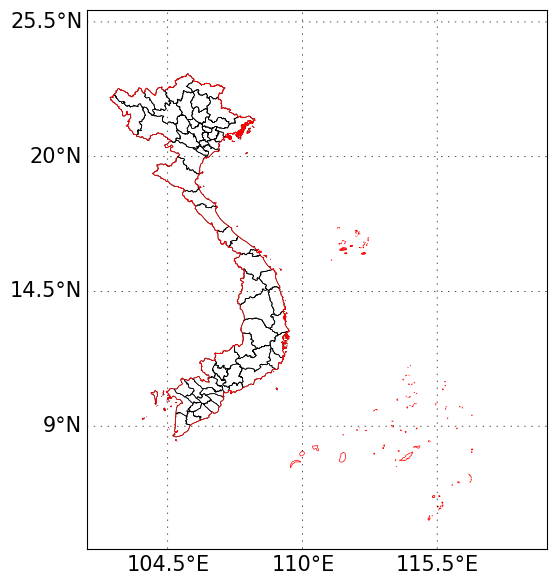

In [4]:

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(1,1,1)

# Initialize a map of Vietnam and its surrounding region
lon_min = 101.2
lon_max = 120
lat_min = 4
lat_max = 26
map = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,
    urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',epsg=4326)

map.readshapefile(r'/home/ubuntu/year3/data_visualisation/gadm41_VNM_shp/gadm41_VNM_1', 'vietnam', linewidth=0.5, color='black')
map.readshapefile(r'/home/ubuntu/year3/data_visualisation/gadm41_VNM_shp/gadm41_VNM_0', 'vietnam', linewidth=0.5, color='red')
map.readshapefile('/home/ubuntu/year3/data_visualisation/Islands/haidao', 'haidao', linewidth=0.5, color='r')

parallels = np.arange(-90.,150, np.around((lat_max-lat_min)/4, decimals=1)) 	#lat
meridians = np.arange(0.,180., np.around((lat_max-lat_min)/4, decimals=1))
map.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
map.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)

plt.show()

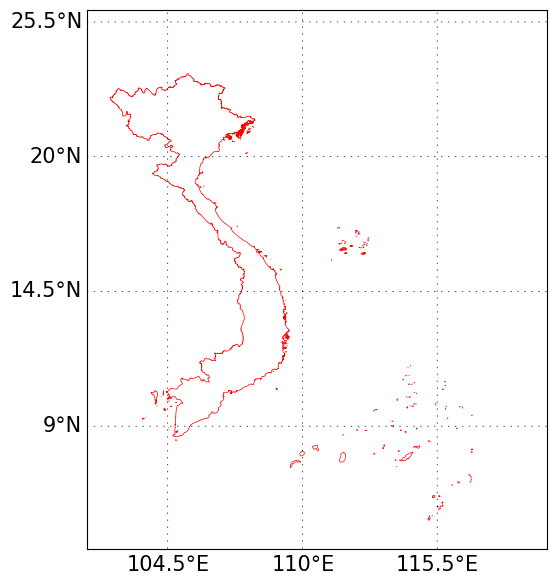

In [5]:

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(1,1,1)

# Initialize a map of Vietnam and its surrounding region
lon_min = 101.2
lon_max = 120
lat_min = 4
lat_max = 26
map = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,
    urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',epsg=4326)

map.readshapefile(r'/home/ubuntu/year3/data_visualisation/gadm41_VNM_shp/gadm41_VNM_0', 'vietnam', linewidth=0.5, color='red')
map.readshapefile('/home/ubuntu/year3/data_visualisation/Islands/haidao', 'haidao', linewidth=0.5, color='r')

parallels = np.arange(-90.,150, np.around((lat_max-lat_min)/4, decimals=1)) 	#lat
meridians = np.arange(0.,180., np.around((lat_max-lat_min)/4, decimals=1))
map.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
map.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)

plt.show()


In [6]:
from numpy import squeeze


nc_path = '/home/ubuntu/year3/data_visualisation/wrfout_d02_2019-11-12_sample.nc'
nc_file  = Dataset(nc_path,'r')

data = squeeze(nc_file.variables['T2'][:])
print ('\nShape of data: ', data.shape)

lat = squeeze(nc_file.variables['XLAT'][:])
lon = squeeze(nc_file.variables['XLONG'][:])
print ('Shape of lat and lon:', lat.shape, lon.shape)


Shape of data:  (24, 120, 111)
Shape of lat and lon: (120, 111) (120, 111)


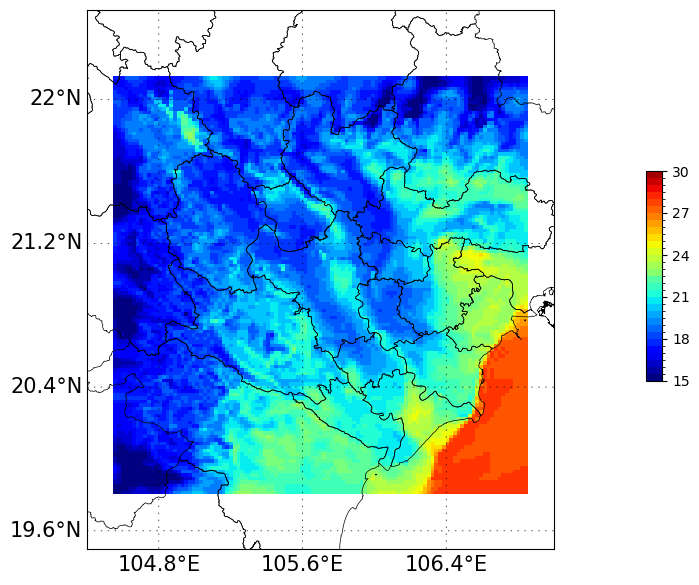

In [8]:
import matplotlib as mpl
from numpy import linspace


fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(1,1,1)

# Initialize a map of Vietnam and its surrounding region
lon_min = 104.4
lon_max = 107
lat_min = 19.5
lat_max = 22.5
map = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,
    urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',epsg=4326)

map.readshapefile(r'/home/ubuntu/year3/data_visualisation/gadm41_VNM_shp/gadm41_VNM_1', 'vietnam', linewidth=0.5, color='black')
map.readshapefile('/home/ubuntu/year3/data_visualisation/Islands/haidao', 'haidao', linewidth=0.5, color='r')

parallels = np.arange(-90.,150, np.around((lat_max-lat_min)/4, decimals=1)) 	
meridians = np.arange(0.,180., np.around((lat_max-lat_min)/4, decimals=1))
map.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
map.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)

levels = linspace(15, 30, 30, endpoint=True)
color_map = plt.get_cmap('jet')
color_map.set_bad(color='white')

norm = BoundaryNorm(levels, ncolors=color_map.N, clip=False)
cm = plt.pcolormesh( lon  , lat , data[0,:,:]-273.15,norm = norm,cmap='jet')

cbar_ax = fig.add_axes([0.92, 0.35, 0.02, 0.3])  
cmap = mpl.colormaps['jet'].resampled(32)
plt.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.BoundaryNorm(np.linspace(15, 30, 31), cmap.N), cmap=cmap), cax=cbar_ax, ticks=np.linspace(15, 30, 6, endpoint=True))

plt.show()

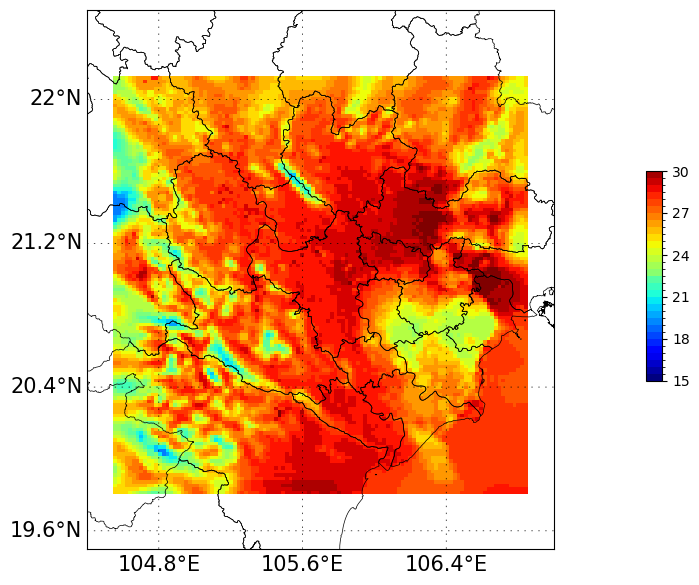

In [18]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(1,1,1)

# Initialize a map of Vietnam and its surrounding region
lon_min = 104.4
lon_max = 107
lat_min = 19.5
lat_max = 22.5
map = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,
    urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',epsg=4326)

map.readshapefile(r'/home/ubuntu/year3/data_visualisation/gadm41_VNM_shp/gadm41_VNM_1', 'vietnam', linewidth=0.5, color='black')
map.readshapefile('/home/ubuntu/year3/data_visualisation/Islands/haidao', 'haidao', linewidth=0.5, color='r')

parallels = np.arange(-90.,150, np.around((lat_max-lat_min)/4, decimals=1)) 	
meridians = np.arange(0.,180., np.around((lat_max-lat_min)/4, decimals=1))
map.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
map.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)

levels = linspace(15, 30, 30, endpoint=True)
color_map = plt.get_cmap('jet')
color_map.set_bad(color='white')

norm = BoundaryNorm(levels, ncolors=color_map.N, clip=False)
cm = plt.pcolormesh( lon  , lat , data[6,:,:]-273.15,norm = norm,cmap='jet')

cbar_ax = fig.add_axes([0.92, 0.35, 0.02, 0.3])  
cmap = mpl.colormaps['jet'].resampled(32)
plt.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.BoundaryNorm(np.linspace(15, 30, 31), cmap.N), cmap=cmap), cax=cbar_ax, ticks=np.linspace(15, 30, 6, endpoint=True))

plt.show()


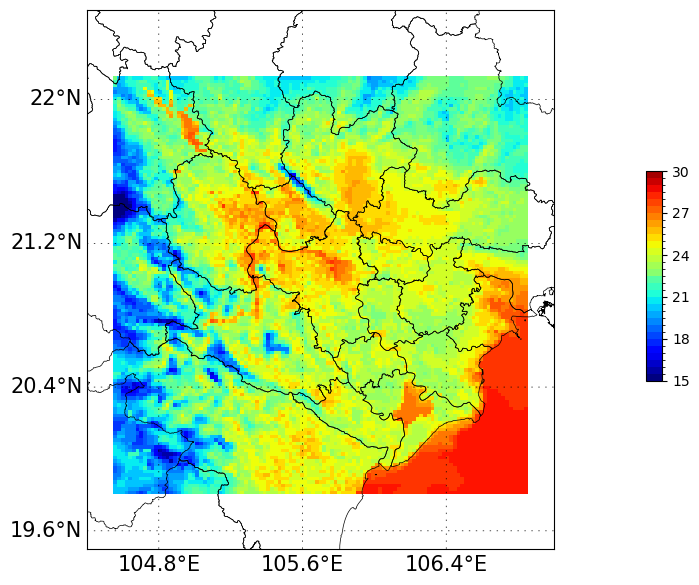

In [19]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(1,1,1)

# Initialize a map of Vietnam and its surrounding region
lon_min = 104.4
lon_max = 107
lat_min = 19.5
lat_max = 22.5
map = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,
    urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',epsg=4326)

map.readshapefile(r'/home/ubuntu/year3/data_visualisation/gadm41_VNM_shp/gadm41_VNM_1', 'vietnam', linewidth=0.5, color='black')
map.readshapefile('/home/ubuntu/year3/data_visualisation/Islands/haidao', 'haidao', linewidth=0.5, color='r')

parallels = np.arange(-90.,150, np.around((lat_max-lat_min)/4, decimals=1)) 	
meridians = np.arange(0.,180., np.around((lat_max-lat_min)/4, decimals=1))
map.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
map.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)

levels = linspace(15, 30, 30, endpoint=True)
color_map = plt.get_cmap('jet')
color_map.set_bad(color='white')

norm = BoundaryNorm(levels, ncolors=color_map.N, clip=False)
cm = plt.pcolormesh( lon  , lat , data[12,:,:]-273.15,norm = norm,cmap='jet')

cbar_ax = fig.add_axes([0.92, 0.35, 0.02, 0.3])  
cmap = mpl.colormaps['jet'].resampled(32)
plt.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.BoundaryNorm(np.linspace(15, 30, 31), cmap.N), cmap=cmap), cax=cbar_ax, ticks=np.linspace(15, 30, 6, endpoint=True))

plt.show()

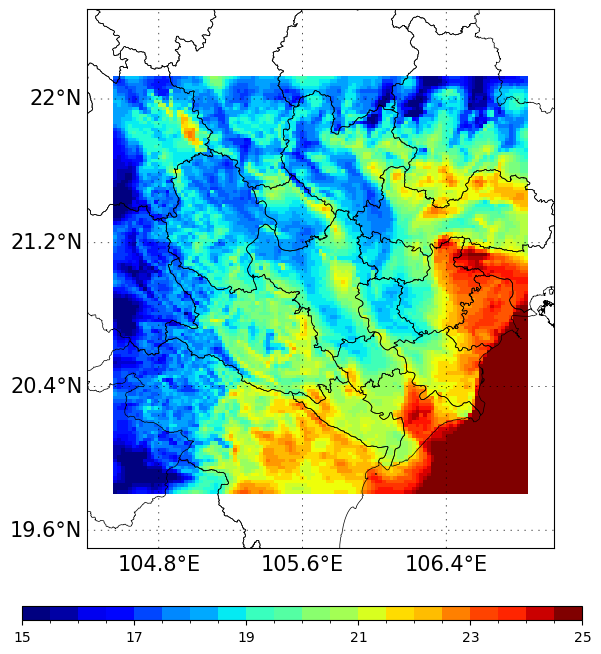

In [36]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(1,1,1)

# Initialize a map of Vietnam and its surrounding region
lon_min = 104.4
lon_max = 107
lat_min = 19.5
lat_max = 22.5
map = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,
    urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',epsg=4326)

map.readshapefile(r'/home/ubuntu/year3/data_visualisation/gadm41_VNM_shp/gadm41_VNM_1', 'vietnam', linewidth=0.5, color='black')
map.readshapefile('/home/ubuntu/year3/data_visualisation/Islands/haidao', 'haidao', linewidth=0.5, color='r')

parallels = np.arange(-90.,150, np.around((lat_max-lat_min)/4, decimals=1)) 	
meridians = np.arange(0.,180., np.around((lat_max-lat_min)/4, decimals=1))
map.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
map.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)

levels = linspace(15, 25, 30, endpoint=True)
color_map = plt.get_cmap('jet')
color_map.set_bad(color='white')

norm = BoundaryNorm(levels, ncolors=color_map.N, clip=False)
cm = plt.pcolormesh( lon  , lat , data[0,:,:]-273.15,norm = norm,cmap='jet')

cbar_ax = fig.add_axes([0.14, 0.007, 0.7, 0.02])  
cmap = mpl.colormaps['jet'].resampled(32)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.BoundaryNorm(np.linspace(15, 25, 21), cmap.N), cmap=cmap), ticks=np.linspace(15, 25, 6, endpoint=True), cax=cbar_ax, orientation='horizontal')

plt.show()


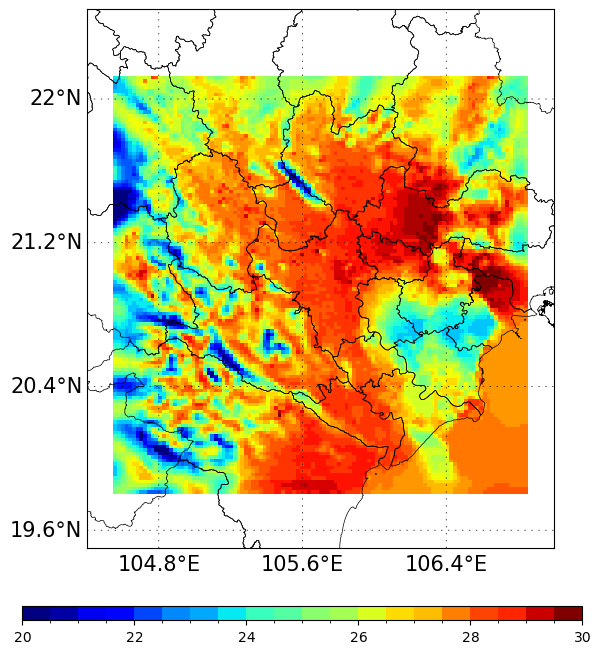

In [38]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(1,1,1)

# Initialize a map of Vietnam and its surrounding region
lon_min = 104.4
lon_max = 107
lat_min = 19.5
lat_max = 22.5
map = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,
    urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',epsg=4326)

map.readshapefile(r'/home/ubuntu/year3/data_visualisation/gadm41_VNM_shp/gadm41_VNM_1', 'vietnam', linewidth=0.5, color='black')
map.readshapefile('/home/ubuntu/year3/data_visualisation/Islands/haidao', 'haidao', linewidth=0.5, color='r')

parallels = np.arange(-90.,150, np.around((lat_max-lat_min)/4, decimals=1)) 	
meridians = np.arange(0.,180., np.around((lat_max-lat_min)/4, decimals=1))
map.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
map.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)

levels = linspace(20, 30, 30, endpoint=True)
color_map = plt.get_cmap('jet')
color_map.set_bad(color='white')

norm = BoundaryNorm(levels, ncolors=color_map.N, clip=False)
cm = plt.pcolormesh( lon  , lat , data[6,:,:]-273.15,norm = norm,cmap='jet')

cbar_ax = fig.add_axes([0.14, 0.007, 0.7, 0.02])  
cmap = mpl.colormaps['jet'].resampled(32)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.BoundaryNorm(np.linspace(20, 30, 21), cmap.N), cmap=cmap), ticks=np.linspace(20, 30, 6, endpoint=True), cax=cbar_ax, orientation='horizontal')

plt.show()

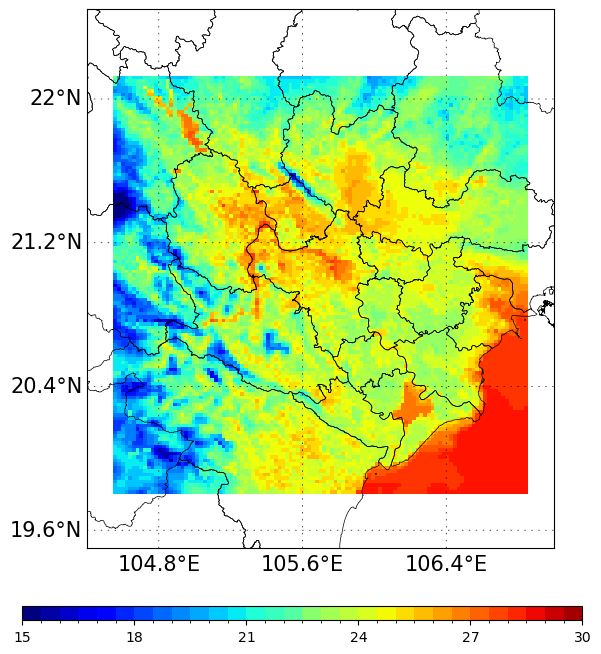

In [39]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(1,1,1)

# Initialize a map of Vietnam and its surrounding region
lon_min = 104.4
lon_max = 107
lat_min = 19.5
lat_max = 22.5
map = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,
    urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',epsg=4326)

map.readshapefile(r'/home/ubuntu/year3/data_visualisation/gadm41_VNM_shp/gadm41_VNM_1', 'vietnam', linewidth=0.5, color='black')
map.readshapefile('/home/ubuntu/year3/data_visualisation/Islands/haidao', 'haidao', linewidth=0.5, color='r')

parallels = np.arange(-90.,150, np.around((lat_max-lat_min)/4, decimals=1)) 	
meridians = np.arange(0.,180., np.around((lat_max-lat_min)/4, decimals=1))
map.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
map.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)

levels = linspace(15, 30, 30, endpoint=True)
color_map = plt.get_cmap('jet')
color_map.set_bad(color='white')

norm = BoundaryNorm(levels, ncolors=color_map.N, clip=False)
cm = plt.pcolormesh( lon  , lat , data[12,:,:]-273.15,norm = norm,cmap='jet')

cbar_ax = fig.add_axes([0.14, 0.007, 0.7, 0.02])  
cmap = mpl.colormaps['jet'].resampled(32)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.BoundaryNorm(np.linspace(15, 30, 31), cmap.N), cmap=cmap), ticks=np.linspace(15, 30, 6, endpoint=True), cax=cbar_ax, orientation='horizontal')

plt.show()

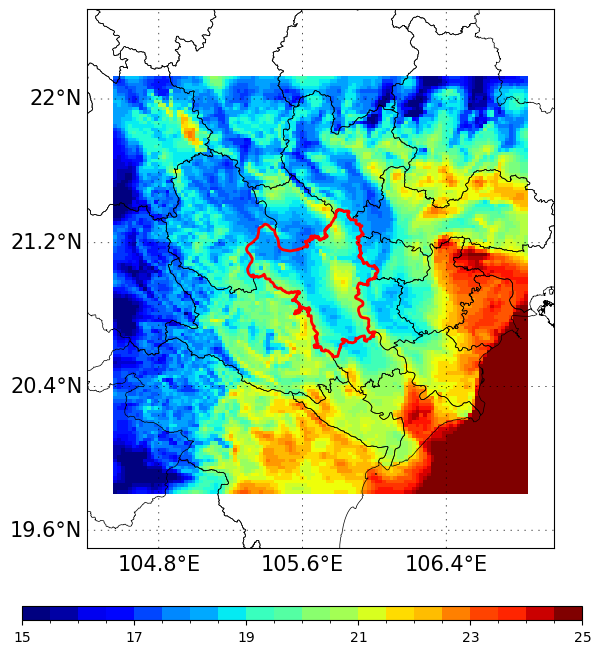

In [41]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(1,1,1)

# Keep the original Vietnam and surrounding region coordinates
lon_min = 104.4
lon_max = 107
lat_min = 19.5
lat_max = 22.5

map = Basemap(projection='merc', llcrnrlon=lon_min, llcrnrlat=lat_min,
              urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='i', epsg=4326)

map.readshapefile(r'/home/ubuntu/year3/data_visualisation/gadm41_VNM_shp/gadm41_VNM_1', 'vietnam', linewidth=0.5, color='black')

# Plot only Hanoi Province by filtering its record from the shapefile
for info, shape in zip(map.vietnam_info, map.vietnam):
    if info['NAME_1'] == 'Hà Nội':  # Check for the province name
        map.plot([x[0] for x in shape], [x[1] for x in shape], linewidth=2, color='red')

# Draw parallels and meridians
parallels = np.arange(-90.,150, np.around((lat_max-lat_min)/4, decimals=1)) 	
meridians = np.arange(0.,180., np.around((lat_max-lat_min)/4, decimals=1))
map.drawparallels(parallels, linewidth=0.5, dashes=[2,8], labels=[1,0,0,0], fontsize=15, zorder=12)
map.drawmeridians(meridians, linewidth=0.5, dashes=[2,8], labels=[0,0,0,1], fontsize=15, zorder=12)

# Plotting data
levels = np.linspace(15, 25, 30, endpoint=True)
color_map = plt.get_cmap('jet')
color_map.set_bad(color='white')

norm = BoundaryNorm(levels, ncolors=color_map.N, clip=False)
cm = plt.pcolormesh(lon, lat, data[0,:,:] - 273.15, norm=norm, cmap='jet')

# Adjust colorbar
cbar_ax = fig.add_axes([0.14, 0.007, 0.7, 0.02])  
cmap = mpl.colormaps['jet'].resampled(32)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.BoundaryNorm(np.linspace(15, 25, 21), cmap.N), cmap=cmap), ticks=np.linspace(15, 25, 6, endpoint=True), cax=cbar_ax, orientation='horizontal')

plt.show()



In [ ]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(1,1,1)

# Keep the original Vietnam and surrounding region coordinates
lon_min = 104.4
lon_max = 107
lat_min = 19.5
lat_max = 22.5

# Initialize a map for the region surrounding Hanoi
map = Basemap(projection='merc', llcrnrlon=lon_min, llcrnrlat=lat_min,
              urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='i', epsg=4326)

# Load the full Vietnam shapefile
map.readshapefile(r'/home/ubuntu/year3/data_visualisation/gadm41_VNM_shp/gadm41_VNM_1', 'vietnam', linewidth=0.5, color='black')

# Plot only Hanoi Province by filtering its record from the shapefile
for info, shape in zip(map.vietnam_info, map.vietnam):
    if info['NAME_1'] == 'Hà Nội':  # Check for the province name
        map.plot([x[0] for x in shape], [x[1] for x in shape], linewidth=2, color='red')

# Draw parallels and meridians
parallels = np.arange(-90.,150, np.around((lat_max-lat_min)/4, decimals=1)) 	
meridians = np.arange(0.,180., np.around((lat_max-lat_min)/4, decimals=1))
map.drawparallels(parallels, linewidth=0.5, dashes=[2,8], labels=[1,0,0,0], fontsize=15, zorder=12)
map.drawmeridians(meridians, linewidth=0.5, dashes=[2,8], labels=[0,0,0,1], fontsize=15, zorder=12)

# Plotting data
levels = np.linspace(15, 25, 30, endpoint=True)
color_map = plt.get_cmap('jet')
color_map.set_bad(color='white')

norm = BoundaryNorm(levels, ncolors=color_map.N, clip=False)
cm = plt.pcolormesh(lon, lat, data[0,:,:] - 273.15, norm=norm, cmap='jet')

# Adjust colorbar
cbar_ax = fig.add_axes([0.14, 0.007, 0.7, 0.02])  
cmap = mpl.colormaps['jet'].resampled(32)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.BoundaryNorm(np.linspace(15, 25, 21), cmap.N), cmap=cmap), ticks=np.linspace(15, 25, 6, endpoint=True), cax=cbar_ax, orientation='horizontal')

plt.show()


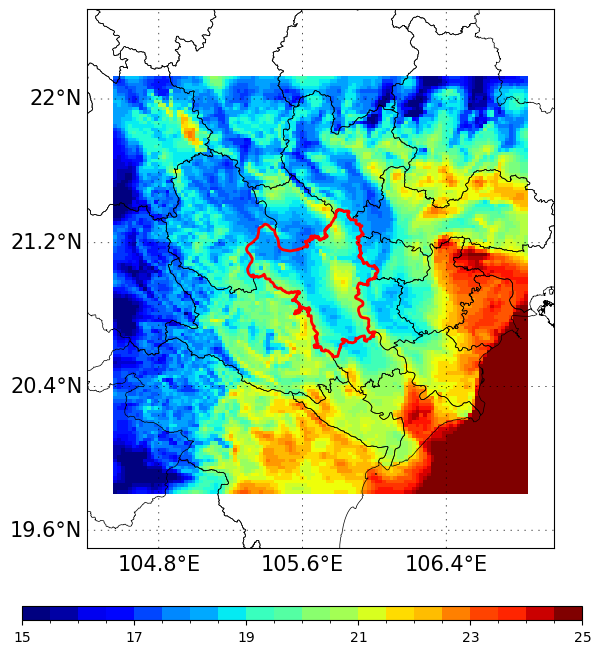

In [42]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(1,1,1)

# Keep the original Vietnam and surrounding region coordinates
lon_min = 104.4
lon_max = 107
lat_min = 19.5
lat_max = 22.5

# Initialize a map for the region surrounding Hanoi
map = Basemap(projection='merc', llcrnrlon=lon_min, llcrnrlat=lat_min,
              urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='i', epsg=4326)

# Load the full Vietnam shapefile
map.readshapefile(r'/home/ubuntu/year3/data_visualisation/gadm41_VNM_shp/gadm41_VNM_1', 'vietnam', linewidth=0.5, color='black')

# Plot only Hanoi Province by filtering its record from the shapefile
for info, shape in zip(map.vietnam_info, map.vietnam):
    if info['NAME_1'] == 'Hà Nội':  # Check for the province name
        map.plot([x[0] for x in shape], [x[1] for x in shape], linewidth=2, color='red')

# Draw parallels and meridians
parallels = np.arange(-90.,150, np.around((lat_max-lat_min)/4, decimals=1)) 	
meridians = np.arange(0.,180., np.around((lat_max-lat_min)/4, decimals=1))
map.drawparallels(parallels, linewidth=0.5, dashes=[2,8], labels=[1,0,0,0], fontsize=15, zorder=12)
map.drawmeridians(meridians, linewidth=0.5, dashes=[2,8], labels=[0,0,0,1], fontsize=15, zorder=12)

# Plotting data
levels = np.linspace(15, 25, 30, endpoint=True)
color_map = plt.get_cmap('jet')
color_map.set_bad(color='white')

norm = BoundaryNorm(levels, ncolors=color_map.N, clip=False)
cm = plt.pcolormesh(lon, lat, data[0,:,:] - 273.15, norm=norm, cmap='jet')

# Adjust colorbar
cbar_ax = fig.add_axes([0.14, 0.007, 0.7, 0.02])  
cmap = mpl.colormaps['jet'].resampled(32)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.BoundaryNorm(np.linspace(15, 25, 21), cmap.N), cmap=cmap), ticks=np.linspace(15, 25, 6, endpoint=True), cax=cbar_ax, orientation='horizontal')

plt.show()
